In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the input data
url = '../data/yellow_tripdata.csv'
raw_data = pd.read_csv(url)
raw_data

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1,16.54
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1,16.19
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1,12.00
3,2,2,19.30,2,1,132,148,1,70.0,0.5,0.00,1,5.00
4,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41197,2,1,16.94,2,1,132,164,1,70.0,0.5,6.94,1,5.00
41198,2,4,19.83,2,1,132,166,1,70.0,0.5,6.94,1,8.00
41199,2,1,17.31,2,1,132,137,1,70.0,0.5,6.94,1,8.00
41200,2,1,17.28,2,1,132,233,1,70.0,0.5,6.94,1,16.19


<Axes: >

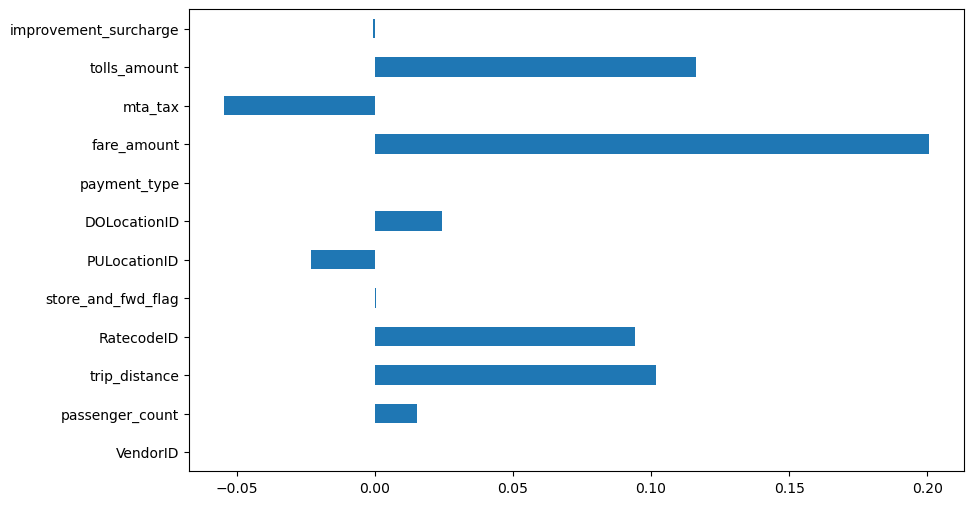

In [3]:
# Plot correlation of input features with the target variable 'tip_amount'
correlation_values = raw_data.corr()['tip_amount'].drop('tip_amount')
correlation_values.plot(kind='barh', figsize=(10, 6))
# Shows payment_type, VendorID, store_and_fwd_flag, and improvement_surcharge have little to no correlation with tip_amount


In [4]:
# Dataset Preprocessing: prepare data for training

# Extract the target variable 'tip_amount' as labels
y = raw_data[['tip_amount']].values.astype('float32')

# Drop the target variable from the features dataframe
proc_data = raw_data.drop(['tip_amount'], axis=1)

# Convert the remaining dataframe to a feature matrix
X = proc_data.values

# Normalize the feature matrix using L1 norm along each sample
X = normalize(X, axis=1, norm='l1', copy=False)


In [14]:
# Split dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [15]:
# Import Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Initialize the model with specified criterion and max_depth
dt_reg = DecisionTreeRegressor(criterion='squared_error', max_depth=8, random_state=35)

# Train the Decision Tree Regressor on training data
dt_reg.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=8, random_state=35)

In [16]:
# Run inference using the trained Decision Tree Regressor model
y_pred = dt_reg.predict(X_test)

# Evaluate mean squared error on the test dataset
mse_score = mean_squared_error(y_test, y_pred)
print('MSE score : {0:.3f}'.format(mse_score))

# Calculate and print R^2 score (coefficient of determination)
r2_score = dt_reg.score(X_test, y_test)
print('R^2 score : {0:.3f}'.format(r2_score))


MSE score : 25.195
R^2 score : 0.003


<b> Problems<b/>

In [17]:
# Initialize Decision Tree Regressor with max_depth=12
dt_reg_12 = DecisionTreeRegressor(criterion='squared_error', max_depth=12, random_state=35)

# Train the model
dt_reg_12.fit(X_train, y_train)

# Predict on test data
y_pred_12 = dt_reg_12.predict(X_test)

# Calculate MSE
mse_12 = mean_squared_error(y_test, y_pred_12)
print(f"MSE with max_depth=12: {mse_12:.3f}")

# Calculate R^2 score
r2_12 = dt_reg_12.score(X_test, y_test)
print(f"R^2 with max_depth=12: {r2_12:.3f}")
# Increasing max_depth to 12 usually leads to a more complex model that may overfit the training data. 
#This can increase the Mean Squared Error (MSE) on the test set and reduce the R² score, possibly even to negative values, indicating poor generalization on unseen data.

MSE with max_depth=12: 27.782
R^2 with max_depth=12: -0.100


In [18]:
# Identify top 3 features most correlated with tip_amount
correlation_values = raw_data.corr()['tip_amount'].drop('tip_amount')
top_3_features = abs(correlation_values).sort_values(ascending=False)[:3]
print("Top 3 features affecting tip_amount:\n", top_3_features)

Top 3 features affecting tip_amount:
 fare_amount      0.200638
tolls_amount     0.116172
trip_distance    0.101819
Name: tip_amount, dtype: float64


In [ ]:
#  Remove features with low correlation and re-run modeling steps
raw_data = raw_data.drop(['payment_type', 'VendorID', 'store_and_fwd_flag', 'improvement_surcharge'], axis=1)

# After dropping, repeat data split, model training, and evaluation
# Example:
X = raw_data.drop('tip_amount', axis=1)
y = raw_data['tip_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

dt_reg = DecisionTreeRegressor(criterion='squared_error', max_depth=8, random_state=35)
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = dt_reg.score(X_test, y_test)
print(f"After removing low-correlation features:\nMSE: {mse:.3f}\nR^2: {r2:.3f}")

# cols_to_drop = ['payment_type', 'VendorID', 'store_and_fwd_flag', 'improvement_surcharge']
# existing_cols = [col for col in cols_to_drop if col in raw_data.columns]
# raw_data = raw_data.drop(existing_cols, axis=1)


In [20]:
#  Check effect of decreasing max_depth to 4
dt_reg_depth4 = DecisionTreeRegressor(criterion='squared_error', max_depth=4, random_state=35)
dt_reg_depth4.fit(X_train, y_train)
y_pred_depth4 = dt_reg_depth4.predict(X_test)

mse_depth4 = mean_squared_error(y_test, y_pred_depth4)
r2_depth4 = dt_reg_depth4.score(X_test, y_test)

print(f"With max_depth=4:\nMSE: {mse_depth4:.3f}\nR^2: {r2_depth4:.3f}")

With max_depth=4:
MSE: 24.122
R^2: 0.045
